<a href="https://colab.research.google.com/github/rezamohammadloo/FacialExpressionClassifierCNN/blob/main/facialEcpressionClassifierCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Extract the archive
zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/archive.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [6]:
train_dir = '/content/train'
test_dir  = '/content/test'

In [123]:
lable_names = os.listdir(train_dir)
print(lable_names)

#dict={}

for i in lable_names:
  print(f'number of train images in class {i} is: {len(os.listdir(os.path.join(train_dir, i)))}')
  print(f'number of test images in class {i} is: {len(os.listdir(os.path.join(test_dir, i)))}')
  #dict.update({i:len(os.listdir(os.path.join(train_dir, i)))})

# print(f'total number of images is :{sum(dict.values())}')

['neutral', 'angry', 'sad', 'disgust', 'fear', 'happy', 'surprise']
number of train images in class neutral is: 4965
number of test images in class neutral is: 1233
number of train images in class angry is: 3995
number of test images in class angry is: 958
number of train images in class sad is: 4830
number of test images in class sad is: 1247
number of train images in class disgust is: 436
number of test images in class disgust is: 111
number of train images in class fear is: 4097
number of test images in class fear is: 1024
number of train images in class happy is: 7215
number of test images in class happy is: 1774
number of train images in class surprise is: 3171
number of test images in class surprise is: 831


<Axes: >

<Figure size 1500x1000 with 0 Axes>

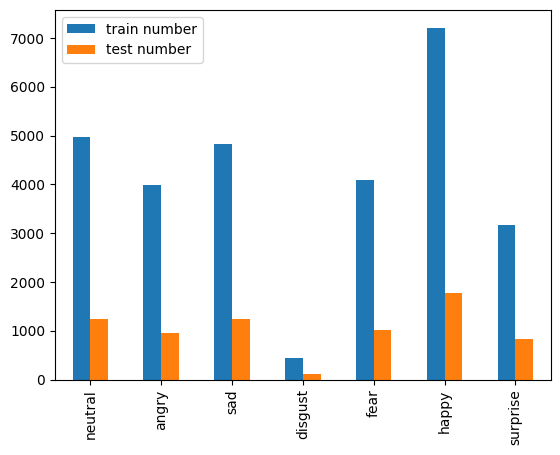

In [127]:
dict = {}
for i in lable_names:
  dict.update(({i:[ len(os.listdir(os.path.join(train_dir, i))) , len(os.listdir(os.path.join(test_dir, i)))]}))

df = pd.DataFrame(dict).T
df.columns = ['train number', 'test number']

plt.figure(figsize = (15,10))
df.plot(kind = 'bar' )

In [128]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),#, input_shape=(48, 48, 1)
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(7, activation='softmax')
])
optimizer = Adam()

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [78]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 batch_normalization_72 (Ba  (None, 46, 46, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 23, 23, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_58 (Dropout)        (None, 23, 23, 16)        0         
                                                                 
 conv2d_73 (Conv2D)          (None, 21, 21, 32)        4640      
                                                                 
 batch_normalization_73 (Ba  (None, 21, 21, 32)      

In [80]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
                                  #  rotation_range=15,
                                  #  width_shift_range = 0.1,
                                  #  height_shift_range = 0.1,
                                  #  horizontal_flip=True,
                                  #  vertical_flip=True)

test_datagen  = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(48, 48),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [81]:
# Constant for epochs
EPOCHS = 20

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch = 28709 // 64,  # 28709 images = batch_size(512) * steps
      epochs=EPOCHS,
      validation_data = validation_generator,
      validation_steps = 7178 // 64,  # 7178 images = batch_size(512) * steps
      verbose=1,
      shuffle = True)

Epoch 1/20
448/448 [==============================] - 17s 33ms/step - loss: 1.6513 - accuracy: 0.3611 - val_loss: 1.8203 - val_accuracy: 0.3432
Epoch 2/20
448/448 [==============================] - 14s 32ms/step - loss: 1.4220 - accuracy: 0.4506 - val_loss: 1.5067 - val_accuracy: 0.4206
Epoch 3/20
448/448 [==============================] - 16s 36ms/step - loss: 1.3076 - accuracy: 0.5000 - val_loss: 1.2711 - val_accuracy: 0.5177
Epoch 4/20
448/448 [==============================] - 15s 33ms/step - loss: 1.2247 - accuracy: 0.5327 - val_loss: 1.3213 - val_accuracy: 0.4904
Epoch 5/20
448/448 [==============================] - 15s 33ms/step - loss: 1.1563 - accuracy: 0.5589 - val_loss: 1.1720 - val_accuracy: 0.5506
Epoch 6/20
448/448 [==============================] - 14s 32ms/step - loss: 1.0980 - accuracy: 0.5808 - val_loss: 1.1757 - val_accuracy: 0.5533
Epoch 7/20
448/448 [==============================] - 17s 39ms/step - loss: 1.0293 - accuracy: 0.6077 - val_loss: 1.4463 - val_accuracy:

<ipython-input-82-4212f3db78fc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


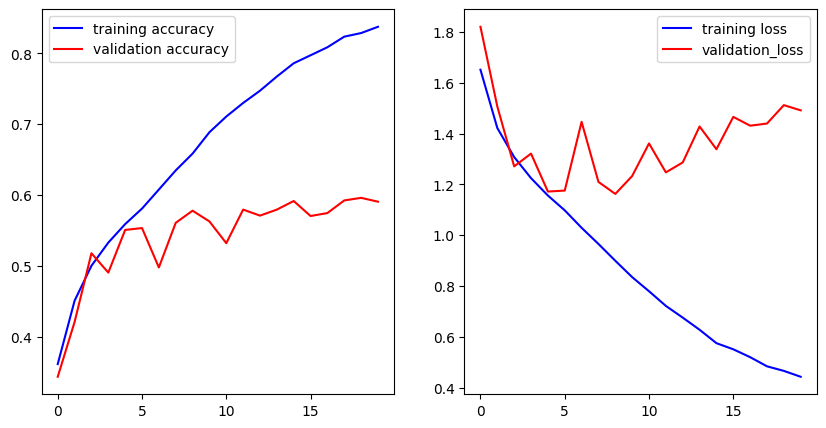

In [82]:
plt.subplots(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label="training accuracy")
plt.plot(history.history['val_accuracy'], color='r', label="validation accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label="training loss")
plt.plot(history.history['val_loss'], color='r', label="validation_loss")
plt.legend()